# Statistics and Probability for Data Science

The information in this notebook is a compilation of my notes from various resources as I re-learned and reviewed the subject. As one can imagine, the material covered by each resource overlapped heavily, thus making specific citations difficult or impossible.

- [EdX's](www.edx.org) Data Science Essentials (Microsoft DAT203.1x)
- [Udacity's](www.udacity.com) Intro to Descriptive Statistics and Intro to Inferential Statistics
- [DataCamp's](www.datacamp.com) Statistical Thinking in Python (parts 1 and 2)
- [Wikipedia](www.wikipedia.org) for distribution formulas
- *"Statistics and Probability in Modern Life"* by Joseph Newmark (Saunders College Publishing). Copyright 1992 Joseph Newmark, 0-03-072867-3 for formal definitions

**Table of Contents**

- [Introductory Terminology](#introductory-terminology)
- [Descriptive Statistics](#descriptive-statistics)
- [Probability Basics](#probability-basics)
- [Random Variables and Their Probability Distributions](#random-variables)
- [Sampling](#sampling)
- [Estimation](#estimation)
- [Hypothesis Testing](#hypothesis-testing)
- [Linear Correlation and Regression](#correlation-regression)
- [The Chi-Square Distribution](#chi-square)
- [Analysis of Variance (ANOVA)](#anova)
- [Nonparametric Statistics](#nonparametric-statistics)

##  <a name="introduction"></a>Introduction

The work done in the name of data science has roots in various fields, including computer science, mathematics, and statistics. Broadly speaking, **statistics** involves collecting and analyzing data to find useful information, with the goal of making decisions based off that knowledge.

There are two major areas in the field of statistics:

1. **Descriptive statistics**, which covers collecting and organizing data and usually performing general calculations to measure central tendency and variability (or spread) of that data
2. **Inferential statistics**, which are procedures to understand relationships, draw conclusions, or make predictions about a population based on sample data from that population

A **population** is the set of all measurements of interest, and a number describing a population is a **parameter**. A **sample** is any small group of individuals or objects selected to represent the entire group (the population), where a number describing a sample is a **statistic**. Often, the population parameters are unknown, hence the need to use sample data to make inferences about it.

A number of inferential statistics techniques rely on **probability theory**, which is a branch of mathematics that's concerned with calculating the likelihood of outcomes of experiments. In other words, it's the science of uncertainty.

##  <a name="introductory-terminology"></a>Introductory Terminology - Types of Data

Before diving into each field, it's important to understand the different **types of data** out there. Generally, it can be qualitative or quantitative, each with further sub-categories.

- **Quantitative Data**: numeric observations, such as height, the number of classes a student is enrolled in, or the percentage of households with pets by city. This can be further broken down into either discrete or continuous data
- **Qualitative Data**: observations that are non-numeric attributes, such as gender, the mode of transportation a person takes, or the type of material something is made of. Also referred to as **categorical** data
- **Discrete Numerical Data**: a subset of quantitative data, where you are able to *count* the possible values (think integers), such as the number of people who contracted the flu this year
- **Continuous Numerical Data**: a subset of quantitative data, where you aren't able to count the possible values (think decimals - usually the result of a measurement that can take on any real number). An example is the fluid ounces of coffee you drink each morning
- **Ordinal Data**: qualitative or categorical data that has an inherent order to it, such as months (January, February, March,...), sizes (small, medium, large), or quality ratings (1-10)
- **Nominal Data**: qualitative data where the categories don't have an inherent order or rank, such as the style of a home (colonial, ranch, contemporary, etc.)
- **Binary Data**: a subset of qualitative data where observations fall into one of two mutually exclusive categories, such as true/false or meets standards / is defective

## <a name="descriptive-statistics"></a>Descriptive Statistics

### General Measures of Central Tendency and Variability

- **Arithmetic Mean**: also known as an average or the expected value. It's the sum of values ($x_i$'s) divided by the number of values ($n$)
- **Median**: the middle value of $x_i$'s in a sorted dataset (also Q2, the 50th percentile, or 0.5 quantile)
- **Mode**: the most common value in the set
- **Variance**: a measure of spread within a collection of data, it's the sum of squared differences between values and the mean
- **Standard Deviation**: the square root of variance
- **Z-Score**: the number of standard deviations a data point is above or below the mean. It tells you where a point is relative to other points, and is useful way to view data with respect to other data
- **Chebyshev's Theorem**: let $k$ be any number $\ge 1$, then the proportion of the distribution that lies within $k$ standard deviations of the mean is at least $1 - \frac{1}{k^2}$ 

| **Statistic**<img width=100 />|**Population**<img width=150 /> | **Sample**<img width=150 /> |
| ------- | :-------: | :-------: |
| Number of Items | $N$ | $n$ |
| Mean | $\mu = \frac{\Sigma x}{N}$ | $\bar{x} = \frac{\Sigma x}{n}$ |
| Variance | $\sigma^2 = \frac{\Sigma (x-\mu)^2}{N}$ | $s^2 = \frac{\Sigma (x-\bar{x})^2}{n-1}$ |
| Standard Deviation | $\sigma = \sqrt{\frac{\Sigma (x-\mu)^2}{N}}$ | $s = \sqrt{\frac{\Sigma (x-\bar{x})^2}{n-1}}$ | 
| Average Deviation | $\frac{\Sigma |x -\mu|}{N}$ | $\frac{\Sigma |x-\bar{x}|}{n}$ |
| Z-Score | $z = \frac{x-\mu}{\sigma}$ | $\hat{z} = \frac{x-\bar{x}}{s}$ |

### Sample Summary Statistics

- **Minimum value**: the smallest value in a sample
- **Q1**: first quartile value (25th percentile)
- **Q2**: median, or second quartile value (50th percentile)
- **Q3**: third quartile value (75th percentile)
- **Maximum value**: the smallest value in a sample
- **Range**: the maximum less minimum value, an indication of spread
- **Interquartile Range (IQR)**: Q3 less Q1
- **Box plots**: great way to visualize summary statistics. The box is Q1 to Q3 with the median marked by a line. The whiskers are $\text{Q1} - 1.5 \times \text{IQR}$ and $\text{Q3} + 1.5 \times \text{IQR}$. Any points beyond the whiskers are marked as dots.


### Why Does the Sample Variance Formula Use $n-1$?

Empirical evidence shows that using $n-1$ in the denominator for sample variance calculations more closely estimates the true population variance, while using $n$ in the denominator underestimates it. In theory, this should be true for any non-uniform distribution. Most distributions cluster around a measure (or measures) of central tendency, meaning there's a higher probability of choosing points close to that metric in a random sample, leading to sample variances that are lower than the population variance.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

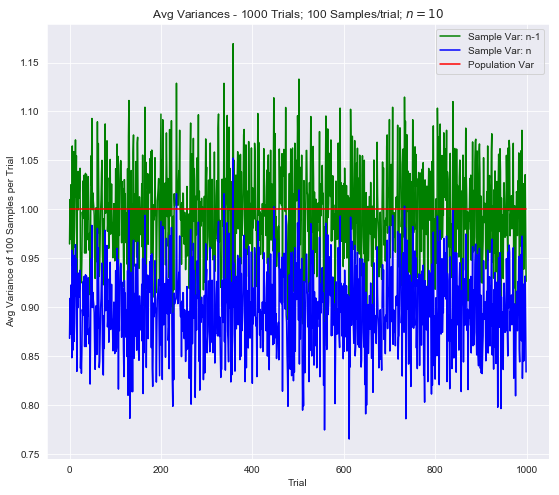

In [2]:
# Assumes population is standard normal distribution
mean = 0
std_dev = 1
sample_size = 10
samps_per_trial = 100
trials = 1000
trials_n = []
trials_n_1 = []
x = np.arange(trials)

# Take samples, calculate variance both ways
for t in range(trials):
    sample_vars_n = []
    sample_vars_n_1 = []
    for i in range(samps_per_trial):
        samp = np.random.normal(mean, std_dev, sample_size)
        sample_vars_n.append(np.var(samp, ddof=0))
        sample_vars_n_1.append(np.var(samp, ddof=1))

    trials_n.append(np.mean(sample_vars_n))
    trials_n_1.append(np.mean(sample_vars_n_1))


# Create plot
plt.figure(figsize=(9, 8))
plt.plot(x, trials_n_1, color='green', label='Sample Var: n-1')
plt.plot(x, trials_n, color='blue', label='Sample Var: n')
plt.plot(x, [std_dev**2]*len(x), color='red', label='Population Var')
plt.xlabel('Trial')
plt.ylabel('Avg Variance of {} Samples per Trial'.format(samps_per_trial))
plt.title(r'Avg Variances - {} Trials; {} Samples/trial; $n={}$'.format(trials, samps_per_trial, sample_size))
plt.legend()
plt.show()

##  <a name="probability-basics"></a>Probability Basics

Before digging into random variables and their distributions, laying out the basic definitions and math behind common probability problems is warranted.

Recall that probability theory is a branch of mathematics that's concerned with calculating the likelihood of outcomes of experiments. Probability must always fall between $0$ and $1$ (inclusive), and can never be a negative number. The naive definition of probability states the probability of getting a favorable outcome $f$ out of $n$ *equally likely* ways as $p = \frac{f}{n}$. A **certain** or **definite** event has a probability of $1$ and a **null** event (one that will never happen) has a probability of $0$.

### Types of Probability Problems

The **counting rule** states that if one thing can be done $m$ ways, and afterwards something else can be done $n$ ways, then both things can be done in a total of $m \cdot n$ different ways in that order.

An example of a counting problem is: how many ways can you choose two letter (repetition is not allowed) followed by a digit? $26 \times 25 \times 10 = 6500$


A **permutation** is any arrangement of distinct objects in a particular order. For example, how many ways can you choose first, second, and third place in a science fair out of 10 entrants? $10 \times 9 \times 8 = 720$. The formula to find the number of permutations of $n$ things taken $k$ at a time is $P(n, k) = \frac{n!}{(n-k)!}$. Note that $n$ things taken $n$ at a time is $n!$.

When there's repetition, the formula changes slightly - you have $n$ things, but $p$ are alike, $q$ are alike, etc, so it's $\frac{n!}{p!q!r!\ldots}$. For example, the number of permutations of the letters in the word "SHELLS" is $\frac{6!}{2!2!1!1!}$ to account for the double "L"s and double "S"s.

A **combination** is a selection of a collection of distinct objects where order is not important. The number of different ways to select $k$ objects from a possible $n$ distinct objects, or $\left( \begin{array}{c} n \\ k \end{array} \right) = \frac{n!}{k!(n-k)!}$. For example, how many ways can you form a committee of three people out of five: $\left( \begin{array}{c} 5 \\ 3 \end{array} \right) = \frac{5!}{3!2!} = 10$.

### Probability Rules

There are several rules for how to combine probabilities, such as addition, conditional probability, multiplication, and Bayes' rule.

Any two events $A$ and $B$ are **mutually exclusive** if both events can't occur at the same time. The **addition rule** states that if $A$ and $B$ are mutually exclusive, then the probability of getting either of them is $p(A \text{ or } B) = p(A) + p(B)$. If the events are not mutually exclusive (both can occur together), then $p(A \text{ or } B) = p(A) + p(B) - p(A \text{ and } B)$. More than two events? Use $p(A \text{ or } B \text{ or } C) = p(A) + p(B) + p(C) - p(A \text{ and } B) - p(A \text{ and } C) - p(B \text{ and } C) + p(A \text{ and } B \text{ and } C)$.

The probability of event $A$ happening $p(A)$, and the probability of $A$ not happening (its **complement**) $p(A')$ (or $p(A^c)$) add to $1$.

The **conditional probability** of event $A$ happening given event $B$ happened is $p(A \text{ | } B) = \frac{p(A \text{ and } B)}{p(B)}$, provided $p(B) \ne 0$.

The **multiplication rule** is if $A$ and $B$ are any events, then $p(A \text{ and } B) = p(A \text{ | } B) \cdot p(B)$.

Events $A$ and $B$ are **independent** if the likelihood of the occurrence of event $B$ is in no way affected by the occurrence or non-occurrence of event $A$. The multiplication rule changes for independent events to $p(A \text{ and } B) = p(A) \cdot p(B)$.

You use **Bayes' formula** when you know the result of an experiment and want to know the probabilities that the outcome was caused by a particular method or event. It starts with 1) a set of mutually exclusive methods ($M_1, M_2, \ldots$) where the probability of applying each method is $P(M_1), P(M_2)$, etc. and 2) the conditional probabilities to achieve a result $R$ given that you applied that method $P(R \text{ | } M_1), P(R \text{ | } M_2)$, etc. Then, knowing the result $R$ happened, the formula calculates the probability of using a certain method to get there - so $P(M_1 \text{ | } R), P(M_2 \text{ | } R),$ etc. Another way of looking at it is given the total probability of getting that result in the system (the denominator in the equations below), what proportion of that is from method $M_1$, what proportion is from method $M_2$, etc.

$$
P(M_1 \text{ | } R) = \displaystyle \frac{P(R \text{ | } M_1) \cdot P(M_1)}{P(R \text{ | } M_1) \cdot P(M_1) + P(R \text{ | } M_2) \cdot P(M_2) + \ldots}
$$

$$
P(M_2 \text{ | } R) = \displaystyle \frac{P(R \text{ | } M_2) \cdot P(M_2)}{P(R \text{ | } M_1) \cdot P(M_1) + P(R \text{ | } M_2) \cdot P(M_2) + \ldots}
$$

More generally, assuming the total probability of success is $p(R)$, **Bayes Rule** is:

$$
P(M \text{ | } R) = \displaystyle \frac{P(R \text{ | } M) \cdot P(M)}{P(R)}
$$


##  <a name="random-variables"></a>Random Variables and Their Probability Distributions

A **random variable** assigns a numerical value to each possible outcome of a random experiment, where the outcome depends on chance. Random variables can be **discrete** (the number of outcomes is countable) or **continuous** (the outcomes can take any real number). Probability is a measure of the likelihood that a random variable takes on a specified range of outcomes, and a **probability distribution** is a function (or mapping) that assigns those probabilities to the values of a random variable. The sum of all the probabilities of a probability distribution is always 1.

The heart of inferential statistics is **probabilistic logic** - given a set of data, you describe probabilistically what you may expect if you acquired those data again. This is the bridge from measured results to probabilistic conclusions about what you might expect if you were to the collect data again. The goal is to be able to make actionable decisions based on those conclusions.

### Discrete Random Variables

Discrete random variables have outcomes that are countable. The classic example is rolling a die, where the outcomes are 1, 2, 3, 4, 5, or 6. The notation $P(X=x)$ notes the probability that random variable $X$ will have outcome $x$.

| Outcome $x$ | Probability $p$ | $P(X=x) = p$<img width=120 /> |
| ------ | ------ | ------ |
| $x_1$ | $p_1$ | $P(X=1) = 1/6$ |
| $x_2$ | $p_2$ | $P(X=2) = 1/6$ |
| $\vdots$ | $\vdots$ | $\vdots$ |
| $x_6$ | $p_6$ | $P(X=6) = 1/6$ |

The table represents a **Probability Mass Function (PMF)** for a fair die random variable:

- $X$ is the random variable, here, the value on the die
- $x$ is an outcome, either 1, 2, 3, 4, 5, or 6
- $P(X=x)$ is the probability that $X$ will have outcome $x$
- the $p$'s for all outcomes must sum to $1$, but don't always have to be equal
- General formula for writing the probability $p$ for an outcome $x_n$ is $P(X=x_n) = p_n$
- Represented visually with outcomes along the $x$-axis and frequencies along the $y$-axis (a histogram)

PMFs are summarized with the following metrics:

| **Metric**<img width=100 /> | **Random Variables**<img width=300 />|
| ------- | :-------: |
| Mean (Expected Value) | $\text{E(X) or } \mu = \sum_i p_i x_i$ |
| Variance |$\text{Var(X) or } \sigma^2 = \sum_i p_i(x_i-\mu)^2$ |
| Alternate Variance |$\text{Var(X) or } \sigma^2 = \sum_i p_i x_i^2 - [\sum_i p_i x_i]^2$ |
| Standard Deviation | $\text{Std(X) or } \sigma = \sqrt{\sum_i p_i (x_i-\mu)^2}$ |
| Average Deviation | $\sum_i p_i|x_i-\mu|$ |

### Common Discrete Probability Distributions

A few common discrete probability distributions are summarized below.

#### Bernoulli Distribution

The **Bernoulli Distribution** is the probability distribution for an experiment with two possible outcomes: "success" (or true/on/1) and "failure" (or false/off/0). The success outcome has probability $p$, where $0 \le p \le 1$, and the failure outcome has probability $1 - p$. $X \sim Bernoulli(p)$:

| Outcome $x$ | Probability $p$ |
| ---- | ---- |
| $1$ | $p$ |
| $0$ | $1 - p$ |

#### Binomial Distribution

The **Binomial Distribution** is the probability distribution for $x$ number of success in a sequence of $n$ independent experiments (aka $n$ repeated Bernoulli trials), all having the probability $p$ of success and $q$ of failure where $q=1-p$. The mean or expected value $E(X) = np$ and the variance $Var(X) = npq$.

$$
P(X=x) = \frac{n!}{x!(n-x)!} p^x (q)^{n-x}
$$

#### Poisson Distribution

The **Poisson Distribution** returns the probability for $x$ number of independent events ("successes") occurring in a continuous interval with a known rate of $\lambda$ (lambda) representing the average number of events that occur per interval. The expected value $E(X) = \lambda$ and the variance $Var(X) = \lambda$.

$$
{\textstyle X \sim \operatorname {Pois} (\lambda)}: P(X=x) = \frac{e^{-\lambda} \lambda^x}{x!}\text{, }x=0, 1, 2 \ldots
$$

#### Hypergeometric Distribution

The **Hypergeometric Distribution** gives the probability for $x$ "successes" when a sample of size $n$ is selected *without replacement* from $N$ items of which $k$ are labeled "success" and $N-k$ are labeled "failure".

$$
{\displaystyle {\textstyle X\sim \operatorname {Hypergeometric} (N, k, n)}: P(X=x)={\frac {{\binom {k}{x}}{\binom {N-k}{n-x}}}{\binom {N}{n}}}, x= 0, 1, 2, \ldots}
$$

### Continuous Random Variables

**Continuous random variables** have outcomes that can take on values of any real number, in other words, they aren't countable. A **probability density function (PDF)** is a way to represent a continuous probability distribution's probability. The area under the PDF represents the probabilities, and the total area integrates to $1$.

The **Cumulative Distribution Function (CDF)** shows you the probability for random variable $x$ to be below a certain value, or $F(X)=P(X<=x)$. If you need a probability for $x$ within a range, you can use subtraction. If you need the probability for $x$ above a certain value, subtract the CDF value for that $x$ from $1$. An **Empirical CDF** is when you calculate a CDF for a sample of data.

In [6]:
def ecdf(data):
    """
    Computes the Empirical Cumulative Distribution Function for a one-dimensional
        array of measurements
    
    :param data: one-dimensional array (or array-like object) of measurements
    :return: tuple of x, y arrays (of same length as `data`)
        `x` holds sorted measurements from `data`
        `y` holds equally-spaced values from 0 to 1
    
    >>> x, y = ecdf(myData)
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

<Figure size 432x288 with 0 Axes>

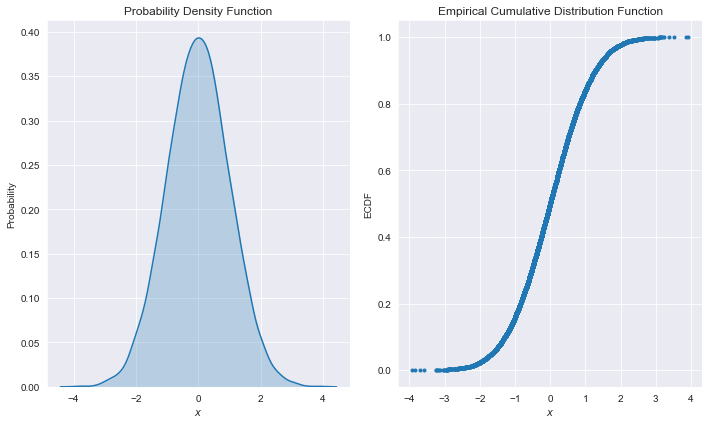

In [11]:
# Example of a PDF and ECDF for a sample of the standard normal distribution

np.random.seed(42)
samp = np.random.normal(size=10000)
x, y = ecdf(samp)

# Create subplots for PDF and ECDF
plt.figure();
plt.subplots(1, 2, figsize=(10, 6));

# PDF of samples
plt.subplot(1, 2, 1);
sns.kdeplot(samp, shade=True);
plt.title('Probability Density Function');
plt.xlabel(r'$x$');
plt.ylabel('Probability');

# ECDF of samples
plt.subplot(1, 2, 2);
plt.plot(x, y, marker='.', linestyle='none');
plt.title('Empirical Cumulative Distribution Function');
plt.xlabel(r'$x$');
plt.ylabel('ECDF');

plt.tight_layout();
plt.show()

### Common Continuous Probability Distributions

A couple common continuous probability distributions are summarized below.

#### Normal Distribution

The **Normal Distribution** (or Gaussian Distribution) is the most well-known of any probability distribution and happens to model natural phenomena in many different capacities. It's described by two parameters: the mean $\mu$ and the variance $\sigma^2$, where variance is the square of the standard deviation $\sigma$.

$$
{\mathcal {N}}(\mu ,\sigma ^{2}) = 	
{\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}
$$

A special version of the Normal Distribution, where the mean is $0$ and standard deviation is $1$ is called the **Standard Normal Distribution**.

Values drawn from a Normal Distribution have $68$% probability of falling within $\pm 1$ standard deviation, $95$% probability of falling within $\pm 2$ standard deviations, and $99.7$% probability of falling within $\pm 3$ standard deviations.

The Normal Distribution is useful because of the **<a name="CLT"></a>Central Limit Theorem**. This states that if you take large random samples of size $n$ (usually $n \gt 30$) from a population with mean $\mu$ and standard deviation $\sigma$, and compute a sample mean $\bar{x}$ for each sample, the following three facts hold:

1. The distribution of the sample means will be approximately normal
2. The mean of the sampling distribution will be equal to the mean of the population, or $\mu_{\bar{x}} = \mu$
3. The standard deviation of the sampling distribution will be equal to the standard deviation of the population divided by the square root of the number of items in each sample, or $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$. This is also called the **standard error** for the sample

The normal distribution can be used to approximate the binomial distribution when $np$ and $nq$ are both greater than $5$. If done, you must add correction factors for continuity on either end of your range. For example, applying a normal distribution to approximate the probability for success of rolling 12 heads out of 20 trials, you would use a range of 11.5-12.5 to calculate the area under the normal curve. For approximating values in the form $x \le a$ or $x \gt a$, add $0.5$ to $a$. For approximating values in the form $x \lt a$ or $x \ge a$, subtract $0.5$ to $a$.

#### Exponential Distribution

The **Exponential Distribution** is the probability distribution for the waiting time between events or arrivals in a Poisson process, where the arrivals are independent from each other. The parameter $\lambda$ is the mean waiting time.

$$
 f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}
$$

## <a name="sampling"></a>Sampling

Inferential statistics involves getting useful information about a larger population from a smaller subset. While any sub group could constitute a sample, in statistics, **sampling** is the process of selecting the subset that truly represents the entire population.

### Sampling Techniques

By definition, any given sample contains some (but not all) information about a population, so it's subject to some level of error. One way to minimize sampling error is make sure the selections are random.

- **Random sample**: a random sample of $n$ items is a sample selected from a population in such a way that every different sample of size $n$ from the population has an equal chance of being selected
- **Stratified sampling**: first divide the population into groups, or strata based on some trait, then select a random sample from each group or strata while maintaining the same proportions of the group in the sample as in the population. This method makes sure no group is missed and is represented in the sample in the same proportion it is in the population. For example, stratifying a population by income level before polling about household expenditures
- **Systemic sampling**: first sort the population items (usually alphabetically or numerically), next randomly select a starting point, then include every $i^{th}$ item until you reach a sample size of $n$ items. This technique is often used to select invoices or file names
- **Cluster sampling**: first divide the population into mutually exclusive clusters that each accurately represent the entire population - the clusters are each small images of the target population, so they're externally homogenous but internally heterongenous. Then select a random sample of clusters. In **one stage** clustering, the entire cluster is used in the sample, in **two stage** clustering, a random sample is chosen from the clusters. This technique is often used in marketing applications

### Calculating Sample Statistics

A sample of size $n$ has a mean of $\bar{x}$ and standard deviation $s$ (see formulas in the [Descriptive Statistics](#descriptive-statistics) section).

#### Mean

The mean of a collection of sample means ($\mu_{\bar{x}}$) is a good approximation of the population mean - you can estimate the population mean ($\mu$) by assuming $\mu = \mu_{\bar{x}}$. The sample means are approximately normally distributed per the [Central Limit Theorem](#CLT).

#### Standard Deviation

You can calculate the standard deviation of sample means with the formula $\sigma_{\bar{x}} = \sqrt{\frac{\sum (\bar{x} - \mu_{\bar{x}})^2}{n-1}}$, where $n$ is the number of sample means. However, because the sample data are being averaged, this generally reduces the variability in the distribution of sample means compared to the overall population.

This relationship is described by the **standard error of the mean** formula: $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$, where $\sigma_{\bar{x}}$ is the standard error and $n$ is the size of the sample.

Note, there's another version of the standard error formula that includes a finite population correction factor of $\sqrt{\frac{N-n}{N-1}}$ that the standard error is multiplied by when a sample constitutes at least 5% of the population.

In [4]:
# Demonstration of the standard error of the mean

trials = 1000
n = 50
mu = 0
sigma = 1
trial_means = [np.mean(np.random.normal(mu, sigma, n)) for i in range(trials)]
means_std = np.std(trial_means)
se = sigma / np.sqrt(n)

print('Standard deviation of sample means (n={0}) over {1} trials: {2:.4f}'.format(n, trials, means_std))
print('Calculated standard error or the mean: {0:.4f}'.format(se))

Standard deviation of sample means (n=50) over 1000 trials: 0.1468
Calculated standard error or the mean: 0.1414


## <a name="estimation"></a>Estimation

Collecting information on an entire population is usually difficult, expensive, or impossible, but sample statistics can estimate a population's parameters. Statistical inference has two major branches: estimation and hypothesis testing

- **Estimation** problems use sample data as a basis to estimate unknown quantities of the population
- **Hypothesis testing** uses sample data to accept or reject specific claims about a population.

**Point estimates** are a single number estimate for a population parameter (for example, a sample mean $\bar{x}$ estimating the population $\mu$). However, sample data (and statistics calculated from them) are subject to sampling error. One downside to point estimates is that they don't indicate how confident you can be that the estimate is close to the population parameter.

This is where **interval estimates** shine - they give an interval in which you can be reasonably sure the true population parameter will lie. Given a probability (usually $90$% or higher), you can construct a **confidence interval** around the metric. Naturally, higher degrees of certainty lead to wider intervals, so there's a tradeoff between certainty and practicality.

### Estimating Population Parameters with a Large Sample Size

Statisticians generally agree that a sample size is "large" if $n \gt 30$, at which point the Central Limit Theorem applies and you can assume normally distributed sample means to construct confidence intervals. You use z-scores from the standardized normal distribution, but the formula $z = \frac{x - \mu}{\sigma}$ has to be adjusted for the standard error to $z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$ for sample means.

Next, you choose the degree of confidence and the corresponding standard normal z-score to get you that amount of area under the curve. For example, a $95$% confidence interval would have $47.5$% area under each half of the bell curve, which falls under a z-score of $\pm 1.96$. Also, since the population standard deviation $\sigma$ generally isn't known, with a large sample size you can substitute in the sample standard deviation $s$ instead.

Solving for $\mu$, the re-arranged formula to get the upper and lower boundaries of a $95$% confidence interval is:

$$
\mu = \bar{x} \pm 1.96 \frac{s}{\sqrt{n}}
$$

You can calculate the $95$% confidence intervals around the population standard deviation ($\sigma$) with the following formula, where $s$ is the sample standard deviation and $n$ is the sample size:

$$
\sigma = \frac{s}{1 \pm \frac{1.96}{\sqrt{2n}}}
$$

### Estimating Population Mean with a Small Sample Size

When the sample size $n$ is less than $30$, you can't base intervals off the normal distribution as shown above. Fortunately, there's the **Student's t-distribution** for this scenario. It shares some similarities with the normal distribution, although it has fatter tails, requires that the distribution the samples are taken from is normal, and depends on a parameter called **degrees of freedom (df)**.

A degree of freedom is the number of independent pieces of information you can choose without violating restrictions. For example, if you have six slots to fill with six appointments, you have a choice for five of those slots then the sixth one is forced, giving you five degrees of freedom. With samples, you have $\bar{x} = \frac{x_1 + x_2 + \ldots x_n}{n}$, or written another way, $x_1 + x_2 + \ldots x_n = n \bar{x}$. You could choose any $x$ for up to $n-1$ slots, but to get the same mean that last $x_n$ choice is forced, therefore you have $n-1$ degrees of freedom.

The formula for the upper and lower boundaries of a $95$% confidence interval is:

$$
\mu = \bar{x} \pm t_{0.025} \frac{s}{\sqrt{n}}
$$

### Estimating Proportions

If data are only available in count or proportion form (a test is 90% accurate), you can use $\hat{p}$ (sample proportion) to estimate $p$ (population proportion) and $\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$ to estimate the standard deviation. The upper and lower boundaries for a $95$% confidence interval around $p$:

$$
p = \hat{p} \pm 1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

### Sample Size

The level of accuracy you need from a sample's estimates largely determines the size of the sample you collect. If $e$ is the maximum level of error you can tolerate your sample mean to be within the true value, then the sample size of size $n$ below results in an estimate for $\mu$ $95$% of the time:

$$
n = \bigg(\frac{1.96 \sigma}{e} \bigg)^2
$$

## <a name="hypothesis-testing"></a>Hypothesis Testing

Hypothesis testing is a way to use sample data to accept or reject claims about a population's parameters. First, a **null hypothesis ($H_0$)** states the status quo, or existing value of the population, then an **alternative hypothesis ($H_1$ or $H_A$)** challenges that. For example, if you want to test whether a new marketing campaign lead to higher average click-through rates to your website, the null hypothesis would state that there was no effect from the campaign (the before and after click-through means are equal), and the alternative hypothesis would state that the after mean is higher.

If the alternative hypothesis states that the actual population parameter is less than or greater than what the null hypothesis states, then it's called a **one-sided test**. If the alternative hypothesis states the parameters are not equal, then it's called a **two-sided test**. The **critical value ($\alpha$ level)**, or the **significance level**, is the boundary between where you reject and fail to reject the null hypothesis, which creates a rejection region.

| Symbol | Rejection Region |
| ----- | ----- |
| $\lt$ | One region, left side |
| $\ne$ | Two regions, both sides |
| $\gt$ | One region, right side |

To actually test your hypothesis, you take your observed data and calculate a **test statistic** (the formula depends on the parameter you're testing), which gives you a **p-value**. This is the probability of observing results as extreme as what you did, under the assumption that the null hypothesis is true. If your p-value falls within the rejection region, then there's strong evidence that your results didn't occur by chance and the observed difference is **significant**.

Statisticians generally use a $5$% or $1$% $\alpha$ (or significance level) to determine the rejection region. If a p-value is below an $\alpha$ of $0.05$ (or $5$%), that means your results were not in the $95$% realm of possibility.

**Hypothesis Testing Steps:**

1. Clearly state the null hypothesis and the parameter you're testing. The null hypothesis is a probability distribution
2. State the alternative hypothesis, which is that the population parameter has a value other than the one stated in the null hypothesis. This indicates whether the test is one- or two-sided
3. Define your test statistic, which is based on the parameter you're testing
4. State the alpha level, which is the threshold for where you accept or reject the null hypothesis
5. Calculate the p-value under the assumption that the null hypothesis is true
6. Reject the null hypothesis if the p-value lies in the rejection region

If the p-value fails to fall in the rejection region, this does NOT prove that the null hypothesis is true. It shows that based on the sample data, there wasn't enough evidence to reject it, so it can't be ruled out as an explanation for the data.

### Types of Errors

Rejecting the null hypothesis is based on observational sample data, so there's always a possiblity of an error. A **type-I error** is made when a true null hypothesis is rejected when it shouldn't be. A **type-II error** is made when a false null hypothesis is not rejected when it should be. The specific testing situation will usually determine which error is worse in that scenario.

The $\alpha$, or significance level, is also interpreted that statisticians want to correctly accept the null hypothesis $95$% or $99$% of the time and accept a $5$% or $1$% probability of making a type-I error. In one-tailed tests, the entire rejection region (with total area equal to $\alpha$) is to the left or right of the mean, whereas in two-tailed tests, the rejection region is split evenly and half is placed on either side of the mean.

### Single Sample Mean Hypothesis Tests

#### Large Sample Size ($n \ge 30$)

For sample sizes where $n \ge 30$, the Central Limit Theorem applies (sample means are normally distributed) and you can use the calculation for $z$-scores as the test statistic. This is sometimes called a $z$-test. As the population standard deviation $\sigma$ is usually not known, you can use the sample standard deviation $s$ as an approximation.

In the formulas below, $z_{\alpha}$ is the $z$-value such that $P(z \gt z_{\alpha}) = \alpha$ and $z_{\alpha/2}$ is the $z$-value such that $P(z \gt z_{\alpha/2}) = \frac{\alpha}{2}$

| <span></span> | One-Tailed Test <img width=150 /> | Two-Tailed Test <img width=150 /> | One-Tailed Test <img width=150 /> |
| ----- | ----- | ----- | ----- |
| Null Hypothesis | $H_0:\text{  }\mu = \mu_0$ | $H_0:\text{  }\mu = \mu_0$ | $H_0:\text{  }\mu = \mu_0$ |
| Alternative Hypothesis | $H_A:\text{  }\mu \lt \mu_0$ | $H_A:\text{  }\mu \ne \mu_0$ | $H_A:\text{  }\mu \gt \mu_0$ |
| Test Statistic | $z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$ | $z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$ | $z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$ |
| Rejection Region | $z \lt -z_{\alpha}$ | $z \lt -z_{\alpha/2}$ or $z \gt z_{\alpha/2}$ | $z \gt z_{\alpha}$ |


#### Small Sample Size ($n \lt 30$)

Hypothesis tests for smaller sample sizes ($n \lt 30)$ need to use the $t$-distribution, and are called $t$-tests. These tests also assume that the population the sample data were collected from is normally distributed.

| <span></span> | One-Tailed Test <img width=150 /> | Two-Tailed Test <img width=150 /> | One-Tailed Test <img width=150 /> |
| ----- | ----- | ----- | ----- |
| Null Hypothesis | $H_0:\text{  }\mu = \mu_0$ | $H_0:\text{  }\mu = \mu_0$ | $H_0:\text{  }\mu = \mu_0$ |
| Alternative Hypothesis | $H_A:\text{  }\mu \lt \mu_0$ | $H_A:\text{  }\mu \ne \mu_0$ | $H_A:\text{  }\mu \gt \mu_0$ |
| Test Statistic | $t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$ | $t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$ | $t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$ |
| Rejection Region | $t \lt -t_{\alpha}$ | $t \lt -t_{\alpha/2}$ or $t \gt t_{\alpha/2}$ | $t \gt t_{\alpha}$ |

### Two Sample Difference of Means Hypothesis Tests

When you have two samples and want to compare them to see whether the observed differences between them are significant, you can use the following techniques.

#### Large Sample Size ($n \ge 30$)

When both sample set sizes are sufficiently large ($n \ge 30$), the assumption of normality holds and the sample standard deviations $s_1$ and $s_2$ can approximate the population standard deviation. Also, it's assumed that the random samples were selected independently from the population.

| <span></span> | One-Tailed Test <img width=150 /> | Two-Tailed Test <img width=150 /> | One-Tailed Test <img width=150 /> |
| ----- | ----- | ----- | ----- |
| Null Hypothesis | $H_0:\text{  }(\mu_1 - \mu_2) = A$ | $H_0:\text{  }(\mu_1 - \mu_2) = A$ | $H_0:\text{  }(\mu_1 - \mu_2) = A$ |
| Alternative Hypothesis | $H_A:\text{  }(\mu_1 - \mu_2) \lt A$ | $H_A:\text{  }(\mu_1 - \mu_2) \ne A$ | $H_A:\text{  }(\mu_1 - \mu_2) \gt A$ |
| Test Statistic | $z = \frac{(\bar{x}_1 - \bar{x}_2) - A}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$ | $z = \frac{(\bar{x}_1 - \bar{x}_2) - A}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$ | $z = \frac{(\bar{x}_1 - \bar{x}_2) - A}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$ |
| Rejection Region | $z \lt -z_{\alpha}$ | $z \lt -z_{\alpha/2}$ or $z \gt z_{\alpha/2}$ | $z \gt z_{\alpha}$ |

In practice, there's often no specific $A$ value (it's zero), so the null hypothesis above can be re-written as $\mu_1 = \mu_2$, and the alternative hypotheses would be $\mu_1 \lt \mu_2$, $\mu_1 \ne \mu_2$, and $\mu_1 \gt \mu_2$.

#### Small Sample Size ($n \lt 30$)

As with single sample set, hypothesis tests comparing sample data for smaller sample sizes ($n \lt 30)$ need to use the $t$-distribution. The same assumption holds that the populations the sample data were collected from are both normally distributed, and it's also assumed the samples were collected independently. Also, it's assumed that the variances of the two populations are equal.

The test statistic in the the table below uses a pooled variance measure, which is $s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$. The total degrees of freedom in the test is $n_1 + n_2 - 2$.

| <span></span> | One-Tailed Test <img width=150 /> | Two-Tailed Test <img width=150 /> | One-Tailed Test <img width=150 /> |
| ----- | ----- | ----- | ----- |
| Null Hypothesis | $H_0:\text{  }(\mu_1 - \mu_2) = A$ | $H_0:\text{  }(\mu_1 - \mu_2) = A$ | $H_0:\text{  }(\mu_1 - \mu_2) = A$ |
| Alternative Hypothesis | $H_A:\text{  }(\mu_1 - \mu_2) \lt A$ | $H_A:\text{  }(\mu_1 - \mu_2) \ne A$ | $H_A:\text{  }(\mu_1 - \mu_2) \gt A$ |
| Test Statistic | $t = \frac{(\bar{x}_1 - \bar{x}_2) - A}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$ | $t = \frac{(\bar{x}_1 - \bar{x}_2) - A}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$ | $t = \frac{(\bar{x}_1 - \bar{x}_2) - A}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$ |
| Rejection Region | $t \lt -t_{\alpha}$ | $t \lt -t_{\alpha/2}$ or $t \gt t_{\alpha/2}$ | $t \gt t_{\alpha}$ |

If the variances of the sampled populations are not equal, the test statistic and degrees of freedom formulas change to the following:

- Test statistic: $t = \frac{\bar{x}_1 - \bar{x}_2 - A}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$
- Degrees of freedom: $df = \frac{\bigg( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \bigg)^2}{\bigg[ \frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1} \bigg]}$

Finally, if the population distributions the samples are drawn from are not normally distributed, the $t$-test is not appropriate. You should use the **Wilcoxon rank-sum test** in this case (see the [nonparametric statistics section for details](#nonparametric-statistics)).

### Hypothesis Tests for Proportions

Tests for proportions (i.e. $X$% of voters are in favor of a measure) can assume a binomial distribution where the probability for success is the same for each trial. In this case, the mean is $\mu = np$ and the standard deviation is $\sigma = \sqrt{np(1-p)}$.

| <span></span> | One-Tailed Test <img width=150 /> | Two-Tailed Test <img width=150 /> | One-Tailed Test <img width=150 /> |
| ----- | ----- | ----- | ----- |
| Null Hypothesis | $H_0:\text{  }\hat{p} = p$ | $H_0:\text{  }\hat{p} = p$ | $H_0:\text{  }\hat{p} = p$ |
| Alternative Hypothesis | $H_A:\text{  }\hat{p} \lt p$ | $H_A:\text{  }\hat{p} \ne p$ | $H_A:\text{  }\hat{p} \gt p$ |
| Test Statistic | $z = \frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}}$ | $z = \frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}}$ | $z = \frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}}$ |
| Rejection Region | $z \lt -z_{\alpha}$ | $z \lt -z_{\alpha/2}$ or $z \gt z_{\alpha/2}$ | $z \gt z_{\alpha}$ |


## <a name="correlation-regression"></a>Linear Correlation and Regression

Linear correlation and regression are foundational techniques to understand whether or not there's a relationship between two or more variables. With two variables, you can plot a scatter diagram and check visually if the dots form a straight line, which would indicate a linear correlation. Methematically, you would calculate the **covariance** between the two variables, which is the expectation of how $X$ and $Y$ vary together:

- Positive covariance indicates the variables move in the same direction, so $X$ above its mean ($+$) and $Y$ above its mean ($+$) OR $X$ below its mean ($-$) and $Y$ below its mean ($+$). In a line, this would show as a positive slope
- Negative covariance indicates the variables move in opposite directions, so $X$ above its mean ($+$) and $Y$ below its mean ($-$) OR $X$ below its mean ($-$) and $Y$ above its mean ($+$). In a line, this would show as a negative slope

Correlation the scaled version of covariance, so the values fall between $1$ and $-1$. The **correlation coefficient** is a number that indicates the strength of a linear relationship between paired values. A result of $+1$ indicates a perfect positive linear correlation, $-1$ indicates a perfect negative correlation, and $0$ indicates no linear relationship.

Below is a table of formulas, where $n$ is the number of paired values.

| <span></span> | Population <img width=300 /> | Sample <img width=200 /> |
| ----- | ----- | ----- |
| Covariance | $Cov(X, Y) = E([X - E(X)][Y - E(Y)])$ | $s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1)}$ |
| Correlation | $Corr(X, Y) = E \bigg( \frac{[X - E(X)]}{\sigma_x} \frac{[Y - E(Y)]}{\sigma_y} \bigg)$ | $\frac{1}{(n-1)} \displaystyle \sum_{i=1}^n \frac{(x_i - \bar{x})}{s_x} \cdot \frac{(y_i - \bar{y})}{s_y}$ |
| Correlation Coefficient | $\rho = \frac{Cov(X, Y)}{\sigma_x \sigma_y}$ | $r = \frac{s_{xy}}{s_x s_y}$ |

Another formula for the sample correlation coefficient $r$ is:

$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{n(\sum x^2) - (\sum x)^2} \sqrt{n(\sum y^2) - (\sum y)^2}}
$$

Of course, the old adage *correlation does not imply causation* applies. The presence of a correlation relationship between two variables does NOT mean that a change in one results in (or causes) a change in the other. A cause-and-effect relationship may not exist - there may be another variable that's the underlying cause for both, or the results may be purely from chance. To check the latter, there are [Pearson's r critical value tables](https://www.radford.edu/~jaspelme/statsbook/Chapter%20files/Table_of_Critical_Values_for_r.pdf) available.

Correlation values indicate the presence and strength of a linear relationship, but can't be applied to predict a new value. **Linear regression** methods are what find the mathematical relationship between the paired variables, which can then be used for prediction. Linear regression fits a line to paired independent and dependent variables, however, there are general regression techniques to fit curves to data.

The **least-squares method** calculates an estimated regression line for a set of data in such a way as to minimize the sum or the squared distances between observed values for $y$ and the estimated regression line. This distance is also known as a **residual** or a **vertical deviation**.

The estimated regression line is in the form $\hat{y} = b_0 + b_1 x$, where $n$ is the pairs of values:

$$
b_1 = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2} \text{, } b_0 = \frac{1}{n} (\sum y - b_1 \cdot \sum x)
$$

An alternate version that uses sample covariance ($s_{xy}$) is:

$$
b_1 = \frac{s_{xy}}{s_x^2} \text{, } b_0 = \bar{y} - b_1 \bar{x}
$$

Polyfit slope: 1.60
Polyfit intercept: 2.98
Pearson's r: 0.95


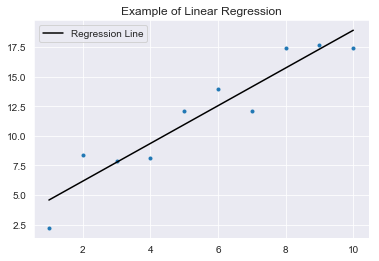

In [41]:
# Linear regression demonstration

np.random.seed(88)
x = np.linspace(1, 10, 10)
y = 2*x + np.random.normal(0, 2, len(x))
deg = 1
b_1, b_0 = np.polyfit(x, y, deg)

# Create plot
plt.plot(x, y, marker='.', linestyle='none');
plt.plot(x, b_1 * x + b_0, 'k-', label='Regression Line');
plt.title('Example of Linear Regression');
plt.legend(loc='upper left');

print('Polyfit slope: {0:.2f}'.format(b_1))
print('Polyfit intercept: {0:.2f}'.format(b_0))
print('Pearson\'s r: {0:.2f}'.format(np.corrcoef(x, y)[0, 1]))

## <a name="chi-square"></a>The Chi-Square Distribution

[TO COME]

## <a name="anova"></a>Analysis of Variance (ANOVA)

[TO COME]

## <a name="nonparametric-statistics"></a>Nonparametric Statistics

[TO COME]